# Análise exploratória do perfil do ciêntista de dados no Brasil - 2019

A presente análise teve como objetivo analisar o perfil dos cientistas de dados por um dataset construído através de uma pesquisa de mercado feita pela comunidade Data Hackers, a maior comunidade de Data Science do Brasil.  

## Descrição dos dados:

Os dados foram obtidos a partir de um questionário com 36 perguntas, realizado de maneira online pela comunidade. O link para mais informações a respeito do questionário e do download para o conjunto de dados pode ser acessado em:

https://www.kaggle.com/datahackers/pesquisa-data-hackers-2019

Para mais informações a respeito da comunidade Data Hackers:

https://datahackers.com.br/


## Importando bibliotecas

In [1]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Visualizando as colunas do dataset

In [2]:
#Melhorar a visualização das colunas
pd.set_option('max_columns',170)

In [3]:
#Importando os dados para uma DataFrame
dados = pd.read_csv('datahackers-survey-2019-anonymous-responses.csv')
#Extraindo o nome somente da coluna na tupla
dados.columns = [eval(col)[1] for col in dados.columns]
#Visualizando o cabeçalho
dados.head()

,id,age,gender,living_in_brasil,living_state,born_or_graduated,degreee_level,job_situation,workers_number,manager,salary_range,time_experience_data_science,time_experience_before,is_data_science_professional,linear_regression,logistic_regression,glms,decision_tree,random_forest,neural_networks,bayesian_inference,ensemble,svms,cnns,rnns,hmms,gans,markov_chains,nlp,gradient_boosted_machines,cluster_analysis,survival_analysis,longitudinal_data_analysis,joint analysis,no_listed_methods,sql_,r,python,c_c++_c#,dotnet,java,julia,sas_stata,visual_basic_vba,scala,matlab,php,no_listed_languages,most_used_proggraming_languages,sql,nosql,images,nlp,videos,sheets,other,sql,nosql,imagens,nlp,vídeos,planilhas,other,aws,gcp,azure,ibm,on_premise_servers,cloud_própria,other,mysql,oracle,sql_server,aurora,dynamodb,coachdb,cassandra,mongodb,mariadb,datomic,s3,postgresql,elaticsearch,db2,ms_access,sqlite,sybase,firebase,vertica,redis,neo4j,google_bigtable,hbase,other,microsoft_powerbi,qlik_view_qlik_sense,tableau,metabase,superset,redash,microstrategy,ibm_analytics_cognos,sap_business_objects,oracle_business_intelligence,birst,looker,google_data_studio,only_excel_gsheets,no_bi_tool_at_work,other,sql_&_stored_procedures,apache_airflow,luigi,aws_glue,talend,pentaho,alteryx,oracle_data_integrator,ibm_data_stage,sap_bw_etl,siss_sql_server_integration_services,other,have_data_warehouse,google_bigquery,aws_redshift,snowflake,oracle,postgres_mysql,ibm,teradata,microsoft_azure,do_not_know,other,data_hackers_blog,data_hackers_podcast,weekly_newsletter,slack_channel,data_hackers_bootcamp,do_not_know_data_hackers,prefered_data_hackers_initiative,telegram_groups,whatsapp_groups,youtube_channels,other_brasilian_blogs,other_slack_channels,twitter,abroad_blogs,abroad_podcasts,meetups_and_events,only_data_hackers,other,udacity,coursera,udemy,height,edx,data_camp,data_quest,kaggle_learn,online_courses,other,data_science_plataforms_preference,other,draw_participation,living_macroregion,origin_macroregion,anonymized_degree_area,anonymized_market_sector,anonymized_manager_level,anonymized_role
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,de R$ 2.001/mês a R$ 3000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,Python,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,de 6 a 10 anos,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Python,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,Newsletter Semanal,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,Udemy,N

### Selecionando somente profissionais da área

In [4]:
#Selecionando pessoas que se consideravam profissionais na área de dados 
selecao = dados['is_data_science_professional'] == 1
#Colocando os dados selecionados em um DataFrame
dados = dados[selecao]
#Visualizando o DataFrame
dados.head()

,id,age,gender,living_in_brasil,living_state,born_or_graduated,degreee_level,job_situation,workers_number,manager,salary_range,time_experience_data_science,time_experience_before,is_data_science_professional,linear_regression,logistic_regression,glms,decision_tree,random_forest,neural_networks,bayesian_inference,ensemble,svms,cnns,rnns,hmms,gans,markov_chains,nlp,gradient_boosted_machines,cluster_analysis,survival_analysis,longitudinal_data_analysis,joint analysis,no_listed_methods,sql_,r,python,c_c++_c#,dotnet,java,julia,sas_stata,visual_basic_vba,scala,matlab,php,no_listed_languages,most_used_proggraming_languages,sql,nosql,images,nlp,videos,sheets,other,sql,nosql,imagens,nlp,vídeos,planilhas,other,aws,gcp,azure,ibm,on_premise_servers,cloud_própria,other,mysql,oracle,sql_server,aurora,dynamodb,coachdb,cassandra,mongodb,mariadb,datomic,s3,postgresql,elaticsearch,db2,ms_access,sqlite,sybase,firebase,vertica,redis,neo4j,google_bigtable,hbase,other,microsoft_powerbi,qlik_view_qlik_sense,tableau,metabase,superset,redash,microstrategy,ibm_analytics_cognos,sap_business_objects,oracle_business_intelligence,birst,looker,google_data_studio,only_excel_gsheets,no_bi_tool_at_work,other,sql_&_stored_procedures,apache_airflow,luigi,aws_glue,talend,pentaho,alteryx,oracle_data_integrator,ibm_data_stage,sap_bw_etl,siss_sql_server_integration_services,other,have_data_warehouse,google_bigquery,aws_redshift,snowflake,oracle,postgres_mysql,ibm,teradata,microsoft_azure,do_not_know,other,data_hackers_blog,data_hackers_podcast,weekly_newsletter,slack_channel,data_hackers_bootcamp,do_not_know_data_hackers,prefered_data_hackers_initiative,telegram_groups,whatsapp_groups,youtube_channels,other_brasilian_blogs,other_slack_channels,twitter,abroad_blogs,abroad_podcasts,meetups_and_events,only_data_hackers,other,udacity,coursera,udemy,height,edx,data_camp,data_quest,kaggle_learn,online_courses,other,data_science_plataforms_preference,other,draw_participation,living_macroregion,origin_macroregion,anonymized_degree_area,anonymized_market_sector,anonymized_manager_level,anonymized_role
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,de R$ 2.001/mês a R$ 3000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,Python,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,de 6 a 10 anos,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Python,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,Newsletter Semanal,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,de 2 a 3 anos,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,SQL,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,Alura,NaN,1.0,Região Sudeste,Região Sudeste,Computação / Engenharia de Software / Sistemas...,Tecnologia/F

### Avaliando a idade e sexo dos cientistas de dados:

In [5]:
#Extraindo as estatísticas da coluna idade
dados['age'].describe()

count    904.000000
mean      29.611726
std        6.453747
min       18.000000
25%       25.000000
50%       29.000000
75%       33.000000
max       50.000000
Name: age, dtype: float64

Verificando a estatística acima é possível observar que a média de idade dos cientistas de dados que responderam a pesquisa foi de 29 anos, sendo a menor idade 18 e a maior 50 anos. É possível visualizar do gráfico boxplot abaixo.

### Boxplot

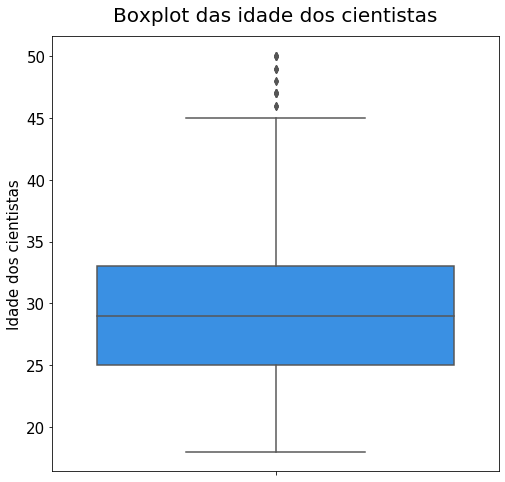

In [6]:
#Criando um boxplot da coluna idade 
ax=sns.boxplot(dados['age'],color='dodgerblue',orient='v')
#Selecionando o tamanho do gráfico
ax.figure.set_size_inches(8,8)
#Colocando título no gráfico
ax.set_title("Boxplot das idade dos cientistas", fontsize=20, pad=15)
#Colocando nome no eixo "y" do gráfico
ax.set_ylabel("Idade dos cientistas",fontsize=15)
#Aumentando  o tamanho dos rótulos do gráfico
ax.tick_params(labelsize = 15)

### Analisando a variável sexo:

In [7]:
#Extraindo dados de sexo para um DataFrame
sexo = pd.DataFrame(dados['gender'].value_counts())
#Transformando o índice em coluna
sexo.reset_index(inplace=True)
#Mudando o nome das colunas
sexo.columns=['sexo','total']
#Visualizando o DataFrame
sexo

,sexo,total
0,Masculino,759
1,Feminino,154


### Análise gráfica

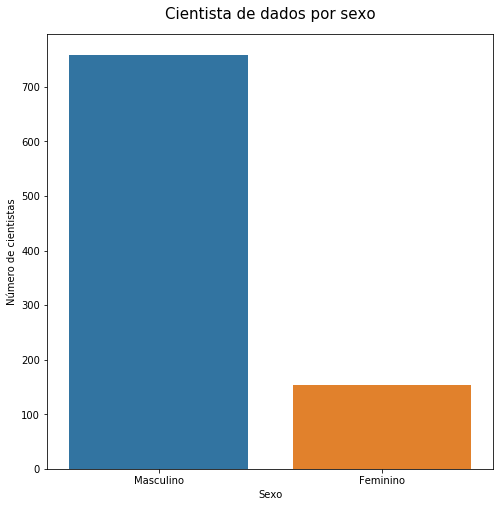

In [8]:
#Criando um gráfico de barras com sexo 
ax=sns.barplot(x='sexo', y='total', data=sexo)
#Escolhendo o tamanho do gráfico
ax.figure.set_size_inches(8,8)
#Colocando título e escolhendo o tamanho da fonte
ax.set_title("Cientista de dados por sexo", fontsize=15, pad=15)
#Colocando nome no eixo "X"
ax.set_xlabel("Sexo",fontsize=10)
#Colocando nome no eixo "X"
ax.set_ylabel("Número de cientistas",fontsize=10)
#Aumentando  o tamanho dos rótulos do gráfico
ax.tick_params(labelsize = 10)

É possível verificar uma quantidade muito maior de pessoas do sexo masculino que responderam a pesquisa quando comparado ao sexo feminino.

### Analisando Idade e Sexo:

In [9]:
#Criando um DataFrame entre idade e sexo
idade = pd.crosstab(dados['age'],dados['gender'])
#Transformando o índice(idade) em coluna
idade.reset_index(inplace=True)
#Visualizando o DataFrame
idade.head()

gender,age,Feminino,Masculino
0,18.0,1,4
1,19.0,1,5
2,20.0,2,12
3,21.0,2,19
4,22.0,10,40


### Análise gráfica

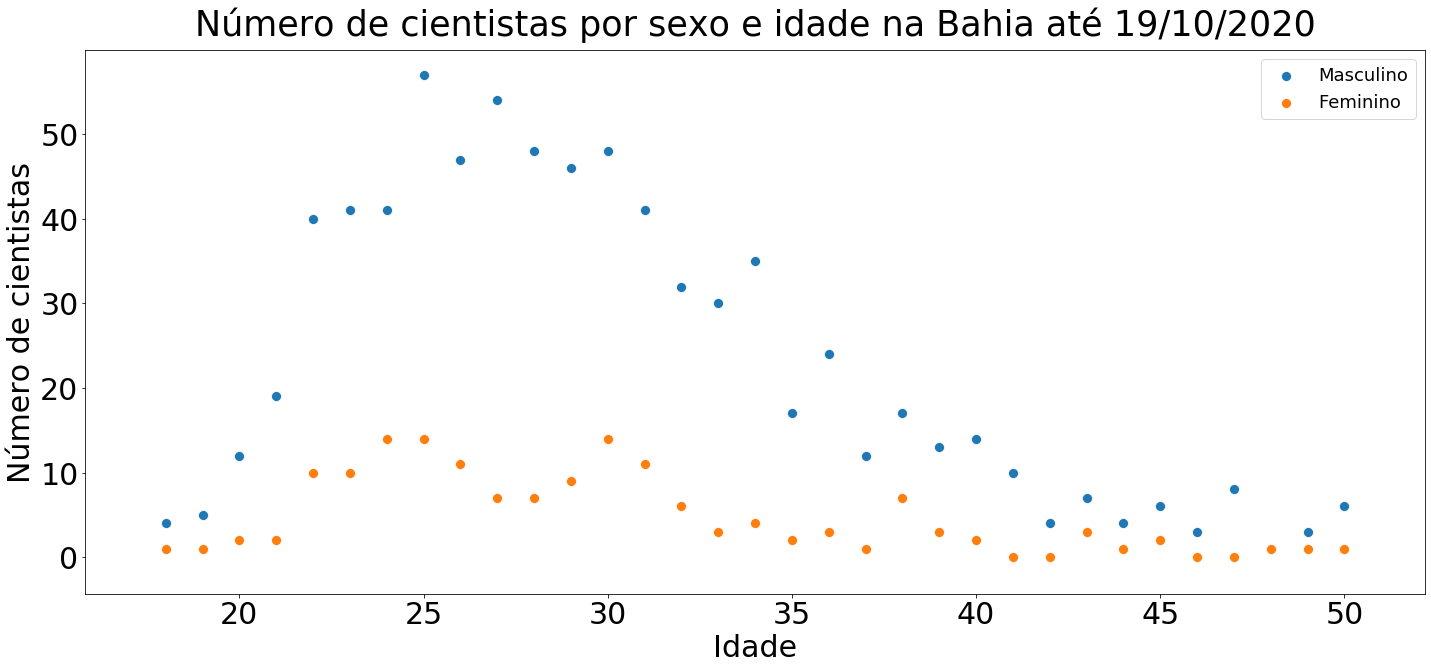

In [10]:
#Criando o gráfico de idade e sexo com a biblioteca seaborn
ax=sns.scatterplot(x='age', y='Masculino', data=idade,s=100)
ax=sns.scatterplot(x='age', y='Feminino', data=idade, s=100)
#Escolhendo o tamanho do gráfico
ax.figure.set_size_inches(24,10)
#Colocando título e escolhendo o tamanho da fonte
ax.set_title("Número de cientistas por sexo e idade na Bahia até 19/10/2020", fontsize=35, pad=15)
#Colocando nome no eixo "X" e escolhendo o tamanho da fonte
ax.set_xlabel("Idade",fontsize=30)
#Colocando nome no eixo "Y" e escolhendo o tamanho da fonte
ax.set_ylabel("Número de cientistas",fontsize=30)
#Aumentando  o tamanho dos rótulos do gráfico
ax.tick_params(labelsize = 30)
#Colocando a legenda do gráfico e tamanho da fonte
ax.legend(['Masculino', 'Feminino'], fontsize=18)

Apesar das tendências serem parecidas para ambos os sexos (Aumento de cientistas com idade entre 20 e 30 anos), a maioria dos cientistas que responderam a pesquisa, em todas as idades, foram homens.

### Analisando grau de formação:

In [11]:
#Extraindo dados de grau de formação para um DataFrame
grau=pd.DataFrame(dados['degreee_level'].value_counts())
#Transformando o índice em coluna
grau.reset_index(inplace=True)
#Renomeando as colunas
grau.columns=['grau','total']
#Visualiando o DataFrame
grau

,grau,total
0,Graduação/Bacharelado,286
1,Pós-graduação,259
2,Estudante de Graduação,162
3,Mestrado,150
4,Doutorado ou Phd,41
5,Não tenho graduação formal,17


### Análise gráfica:

Text(0.5, 0, 'Número de cientistas')

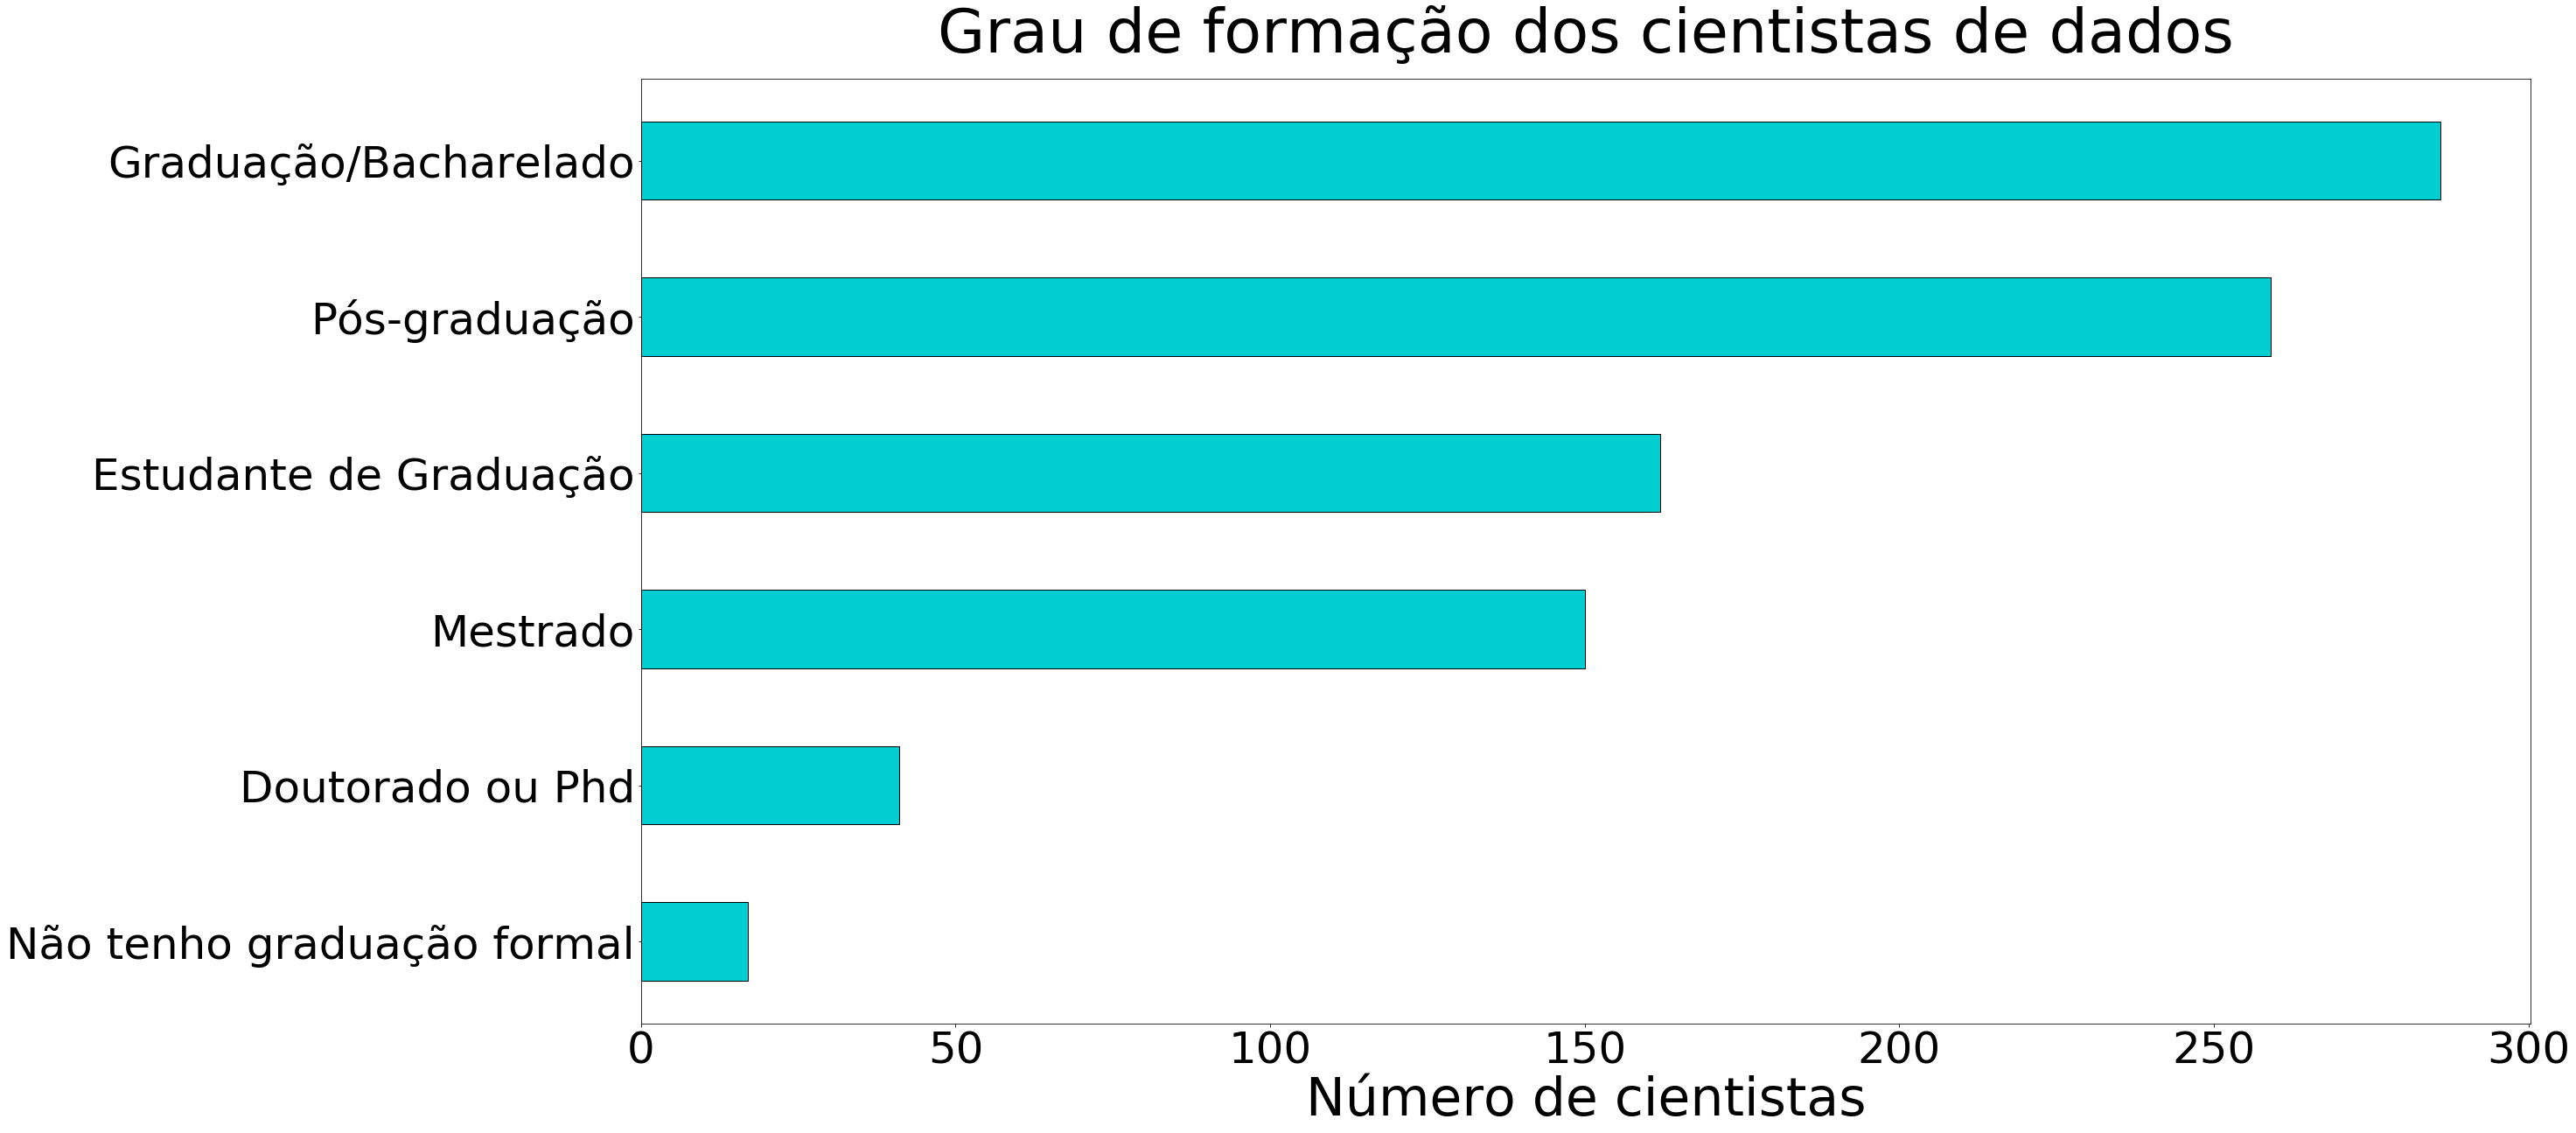

In [12]:
#Estabelecendo o tamanho do gráfico
fig = plt.figure(figsize=(30,15))
eixo=fig.add_axes([0,0,1,1])
#Criando um gráfico de barras horizontais definindo, altura das barras,alinhamento, cor e cor da linha da barra
eixo.barh(grau['grau'],grau['total'],height=0.5,edgecolor='k',align='center',color='darkturquoise')
#Colocando título do gráfico, tamanho da fonte e distância do título para o gráfico(pad)
eixo.set_title('Grau de formação dos cientistas de dados', fontsize=70, pad=30)
##Aumentando o tamanho dos rótulos do gráfico
eixo.tick_params(labelsize = 50)
#Colocando os valores do eixo y do maior para o menor
eixo.invert_yaxis()
##Nomeando o eixo 'X' e escolhendo o tamanho da fonte
eixo.set_xlabel('Número de cientistas', fontsize=60)

A maioria dos ciêntista de dados que responderam a pesquisa possuíam graduação e Pós-graduação. 

### Analisando tempo de experiência anterior na área de TI/Engenharia

In [13]:
#Extraindo dados de tempo de experiência para um DataFrame
xp_b=pd.DataFrame(dados['time_experience_before'].value_counts())
#Transformando o índice em coluna
xp_b.reset_index(inplace=True)
#Renomeando as colunas
xp_b.columns=['xp','total']
#Visualiando o DataFrame
xp_b

,xp,total
0,Não tive experiência na área de TI/Engenharia ...,249
1,Menos de 1 ano,182
2,de 1 a 2 anos,123
3,de 6 a 10 anos,101
4,de 4 a 5 anos,93
5,de 2 a 3 anos,84
6,Mais de 10 anos,83


Text(0.5, 0, 'Número de cientistas')

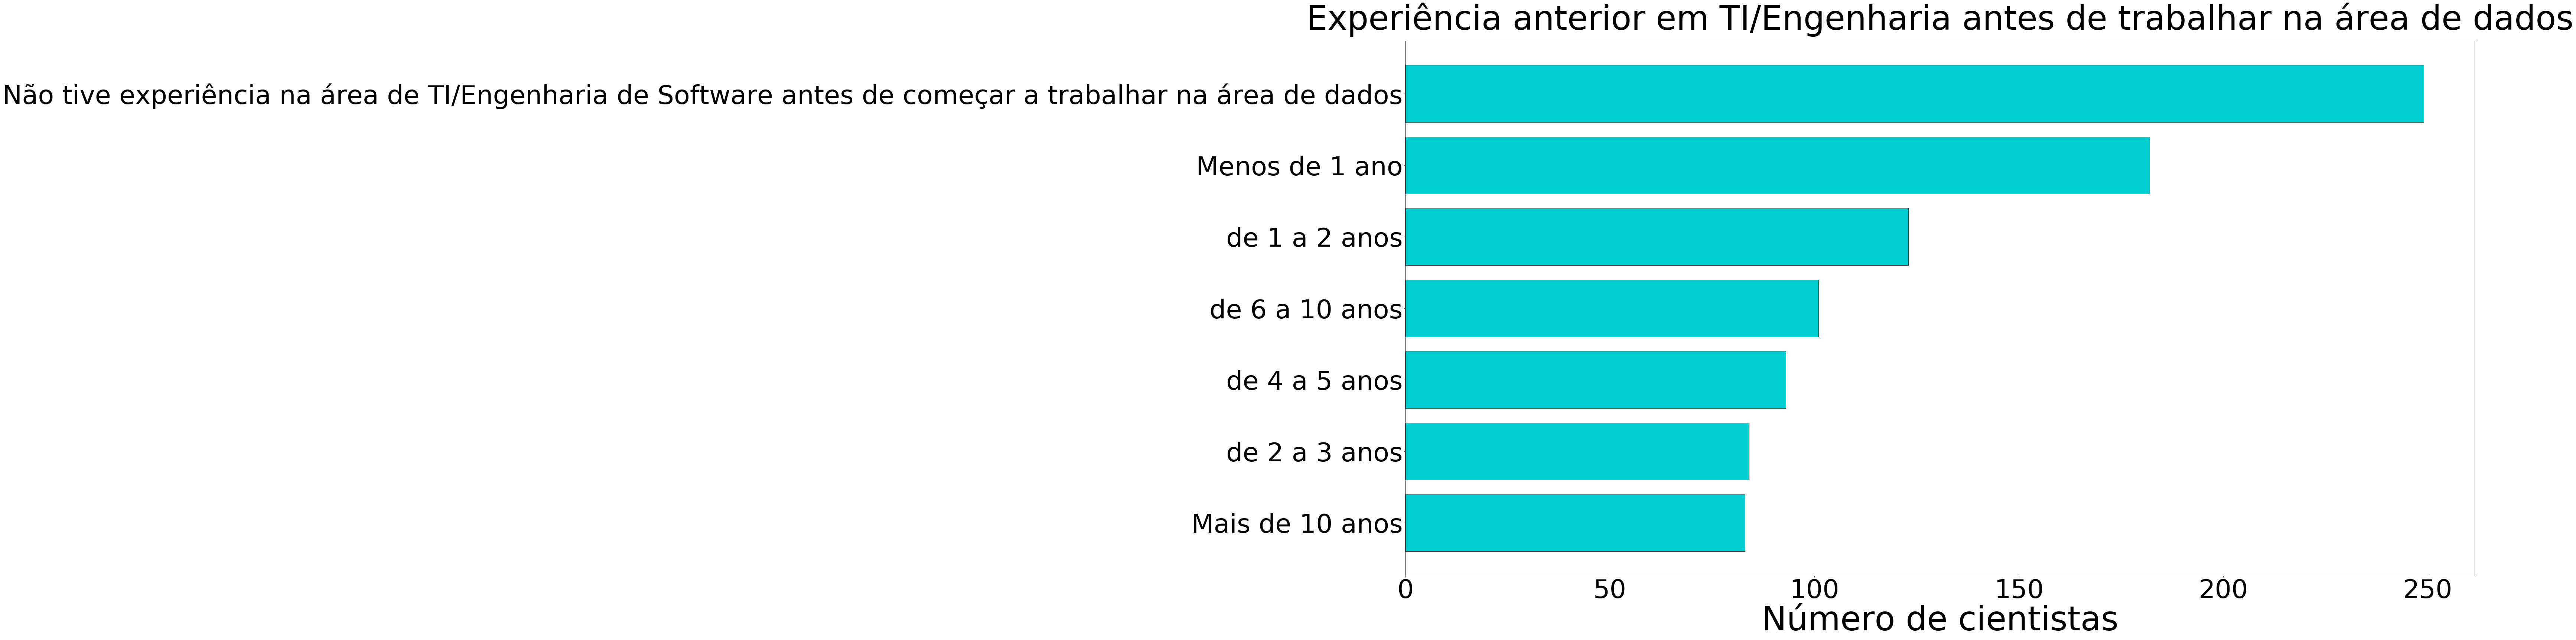

In [14]:
#Estabelecendo o tamanho do gráfico
fig = plt.figure(figsize=(40,20))
eixo=fig.add_axes([0,0,1,1])
#Criando um gráfico de barras horizontais definindo, altura das barras,alinhamento, cor e cor da linha da barra
eixo.barh(xp_b['xp'],xp_b['total'],height=0.8,edgecolor='k',align='center',color='darkturquoise')
#Colocando título do gráfico, tamanho da fonte e distância do título para o gráfico(pad)
eixo.set_title('Experiência anterior em TI/Engenharia antes de trabalhar na área de dados', fontsize=90, pad=30)
##Aumentando o tamanho dos rótulos do gráfico
eixo.tick_params(labelsize = 70)
#Colocando os valores do eixo y do maior para o menor
eixo.invert_yaxis()
##Nomeando o eixo 'X' e escolhendo o tamanho da fonte
eixo.set_xlabel('Número de cientistas', fontsize=90)

O gráfico acima mostra um resultado bastante interessante. A maior parte dos profissionais de ciência de dados que respondeu o questionário não possuía experiência anterior na área de TI/Engenharia antes de começar a trabalhar na área de dados ou tinha menos de 1 ano de experiência. Esse resultado é extremamente motivador para pessoas que possuem outras formações e gostariam de começar uma carreira na área de dados. 

### Analisando tempo de experiência na área de data science

In [15]:
#Extraindo dados de tempo de experiência para um DataFrame
xp_a=pd.DataFrame(dados['time_experience_data_science'].value_counts())
#Transformando o índice em coluna
xp_a.reset_index(inplace=True)
#Renomeando as colunas
xp_a.columns=['xp','total']
#Visualiando o DataFrame
xp_a

,xp,total
0,de 1 a 2 anos,217
1,Menos de 1 ano,201
2,de 2 a 3 anos,162
3,de 4 a 5 anos,125
4,de 6 a 10 anos,100
5,Mais de 10 anos,89
6,Não tenho experiência na área de dados,21


Text(0.5, 0, 'Número de cientistas')

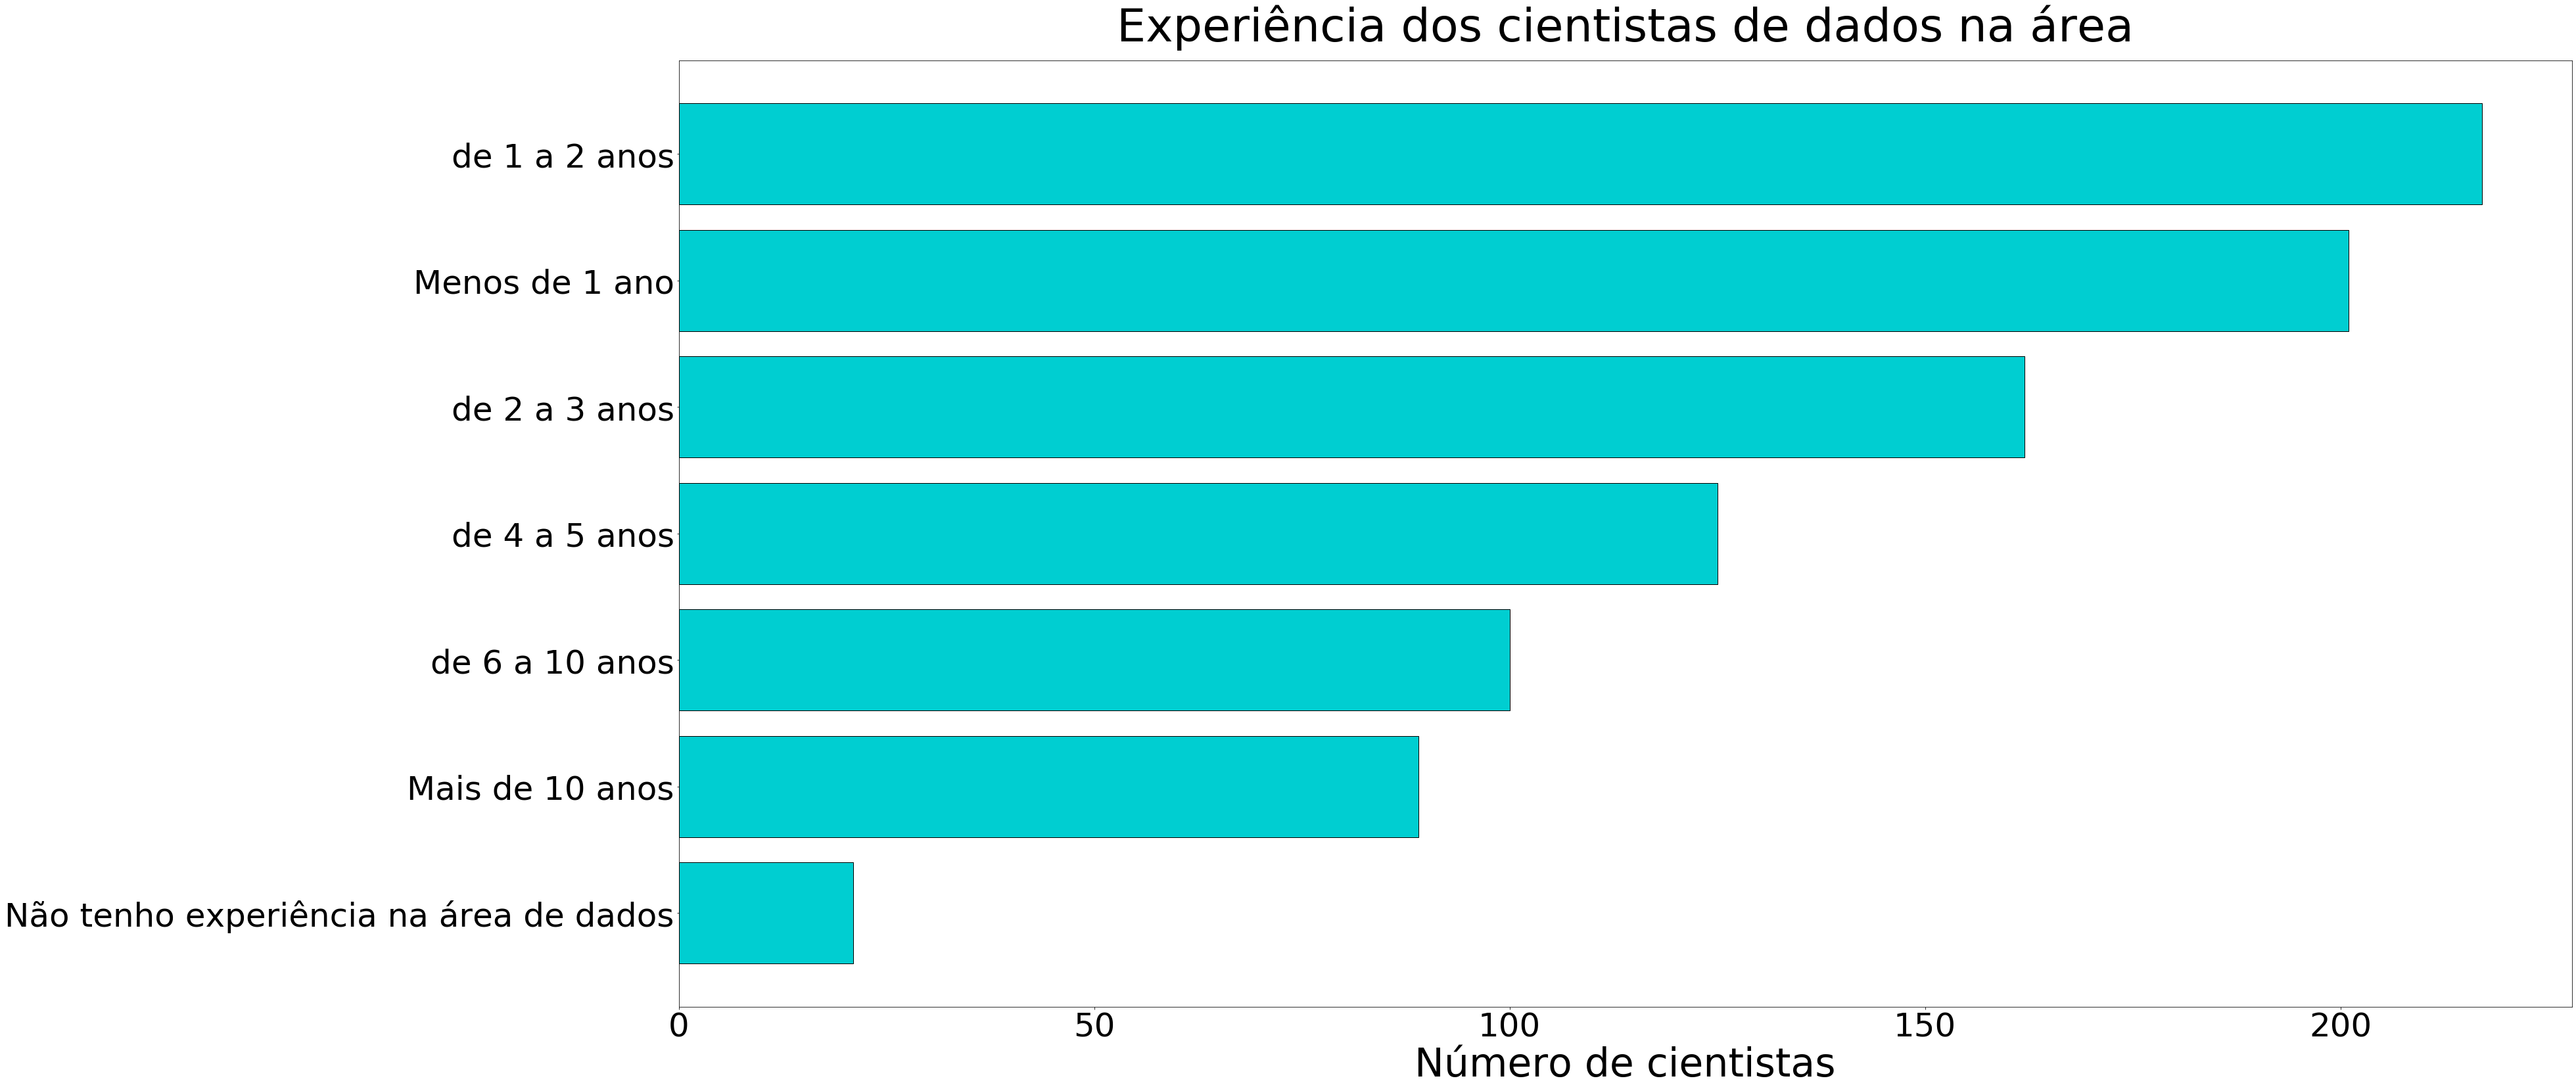

In [16]:
#Estabelecendo o tamanho do gráfico
fig = plt.figure(figsize=(40,20))
eixo=fig.add_axes([0,0,1,1])
#Criando um gráfico de barras horizontais definindo, altura das barras,alinhamento, cor e cor da linha da barra
eixo.barh(xp_a['xp'],xp_a['total'],height=0.8,edgecolor='k',align='center',color='darkturquoise')
#Colocando título do gráfico, tamanho da fonte e distância do título para o gráfico(pad)
eixo.set_title('Experiência dos cientistas de dados na área', fontsize=70, pad=30)
##Aumentando o tamanho dos rótulos do gráfico
eixo.tick_params(labelsize = 50)
#Colocando os valores do eixo y do maior para o menor
eixo.invert_yaxis()
##Nomeando o eixo 'X' e escolhendo o tamanho da fonte
eixo.set_xlabel('Número de cientistas', fontsize=60)

Além disso, a maior parte dos profissionais de ciência de dados que respondeu o questionário possuía menos de 1 ano de experiência na área de dados. Parece que ter experiência na área é importante, mas pode não ser um fator determinante para contratação dos profissionais, visto ainda que a categoria "Não tenho experiência na área de dados", ficou em 4° lugar entre as categorias amostradas. 

### Analisando a situação empregatícia

In [17]:
#Extraindo dados de situação empregatícia para um DataFrame
job=pd.DataFrame(dados['job_situation'].value_counts())
#Transformando o índice em coluna
job.reset_index(inplace=True)
#Renomeando as colunas
job.columns=['tipo','total']
#Visualiando o DataFrame
job

,tipo,total
0,Empregado (CTL),566
1,Empreendedor ou Empregado (CNPJ),124
2,Estagiário,60
3,"Desempregado, buscando recolocação",37
4,Trabalho na área Acadêmica/Pesquisador,35
5,Servidor Público,30
6,Somente Estudante (graduação),24
7,Somente Estudante (pós-graduação),22
8,Freelancer,12
9,Prefiro não dizer,3


Text(0.5, 0, 'Número de cientistas')

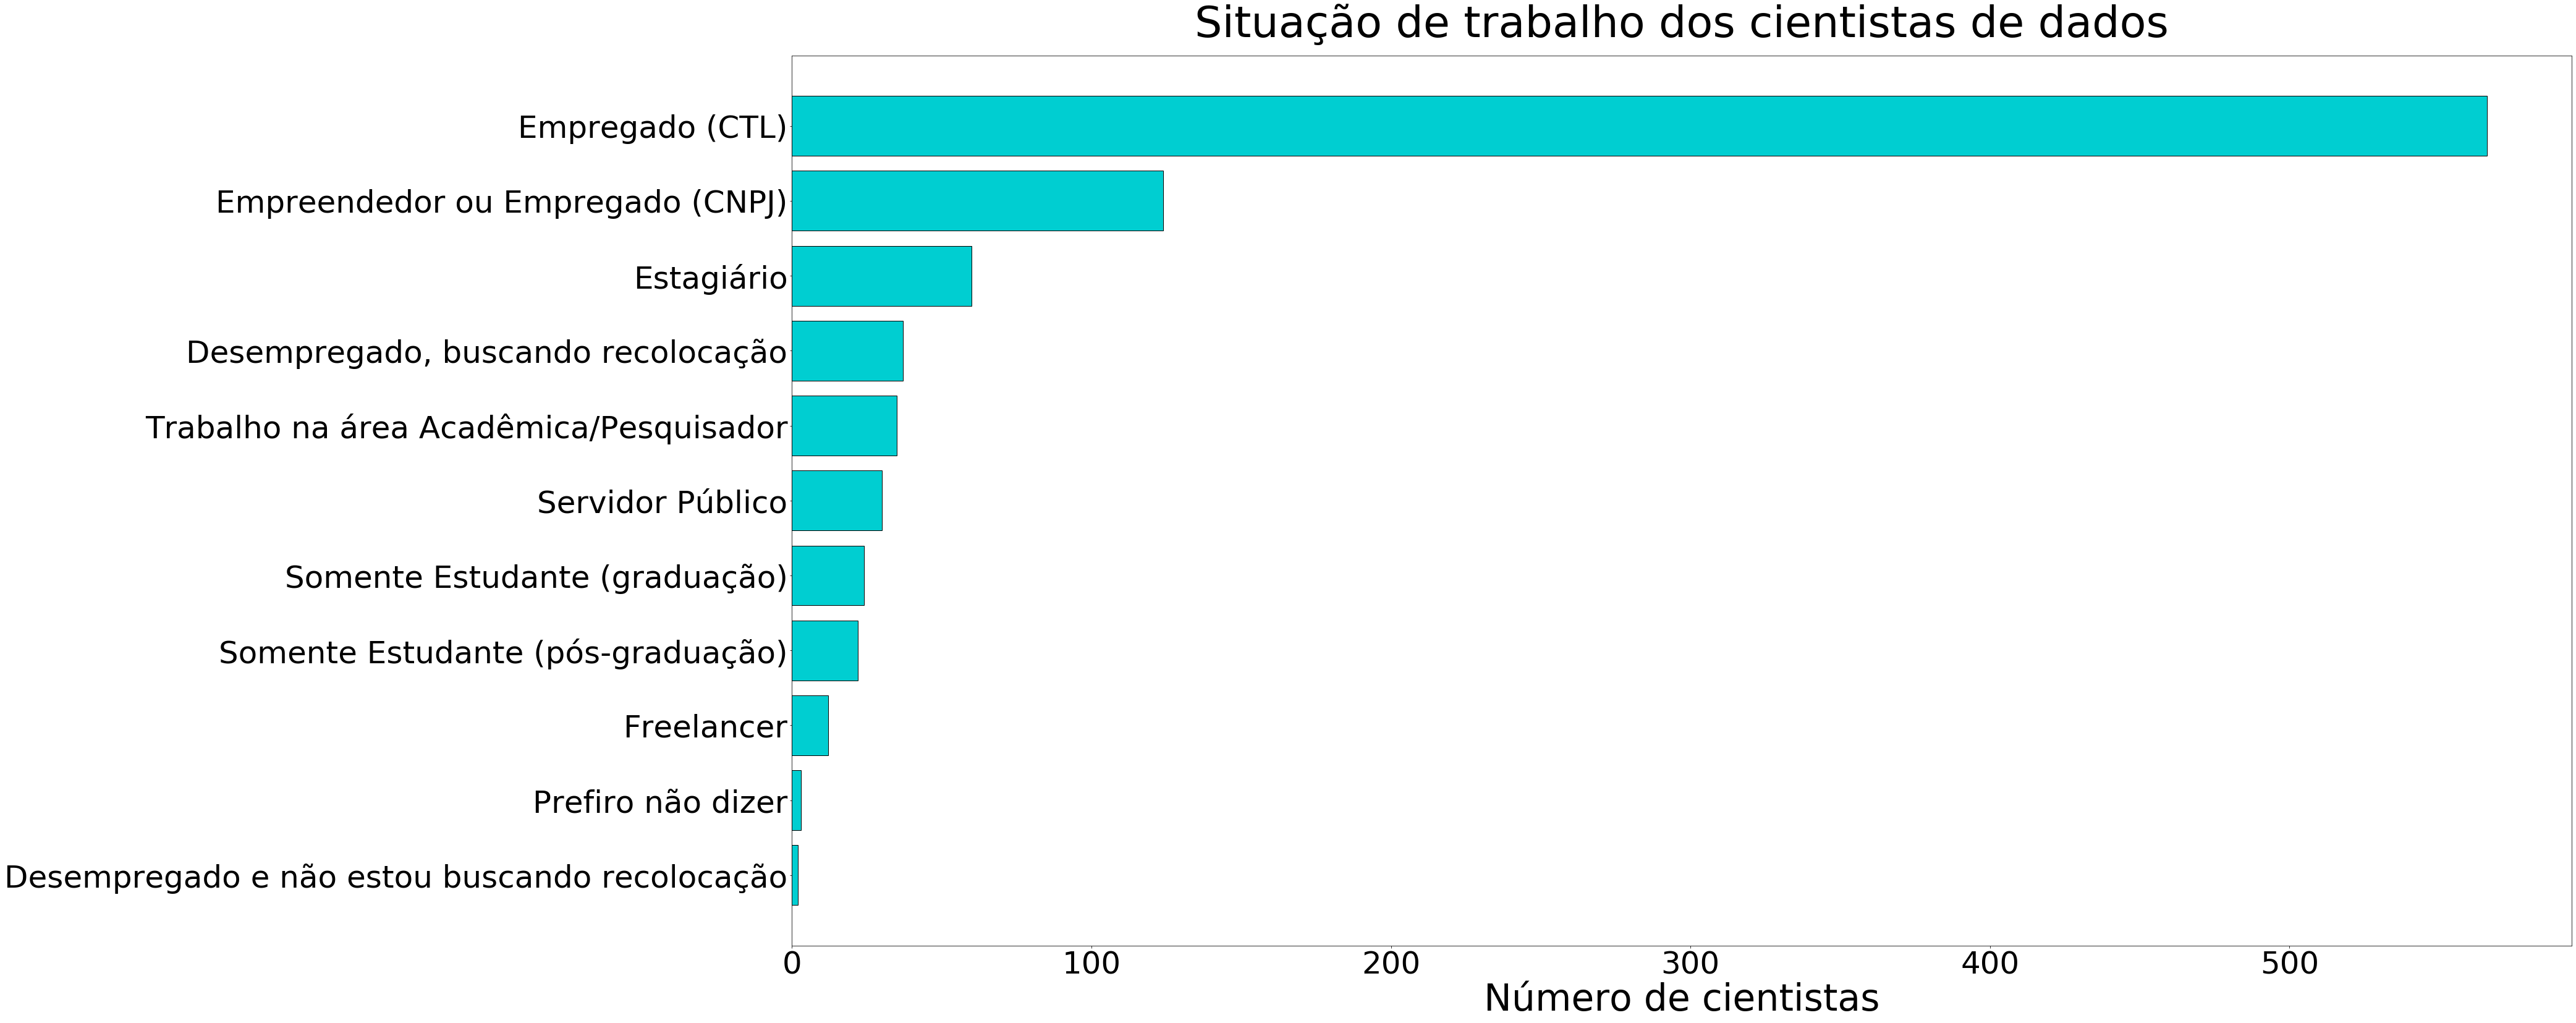

In [18]:
#Estabelecendo o tamanho do gráfico
fig = plt.figure(figsize=(40,20))
eixo=fig.add_axes([0,0,1,1])
#Criando um gráfico de barras horizontais definindo, altura das barras,alinhamento, cor e cor da linha da barra
eixo.barh(job['tipo'],job['total'],height=0.8,edgecolor='k',align='center',color='darkturquoise')
#Colocando título do gráfico, tamanho da fonte e distância do título para o gráfico(pad)
eixo.set_title('Situação de trabalho dos cientistas de dados', fontsize=70, pad=30)
##Aumentando o tamanho dos rótulos do gráfico
eixo.tick_params(labelsize = 50)
#Colocando os valores do eixo y do maior para o menor
eixo.invert_yaxis()
##Nomeando o eixo 'X' e escolhendo o tamanho da fonte
eixo.set_xlabel('Número de cientistas', fontsize=60)

A maior parte dos profissionais que respondeu o questionário era empregado, seguido por empreendedor e estagiário, respectivamente. Destaca-se também desempregado buscando recolocação no mercado(5° lugar).   

### Analisando valor do salário:

In [19]:
#Selecionando cientistas por de salários(porcentagem) 
din=(pd.DataFrame(dados['salary_range'].value_counts())/795*100).round(2)
#Transformando o índice em coluna
din.reset_index(inplace=True)
#Renomeando as colunas
din.columns=['tipo','%_total']
#Visualiando o DataFrame
din

,tipo,%_total
0,de R$ 4.001/mês a R$ 6.000/mês,21.51
1,de R$ 8.001/mês a R$ 12.000/mês,16.98
2,de R$ 6.001/mês a R$ 8.000/mês,16.35
3,de R$ 3.001/mês a R$ 4.000/mês,13.33
4,de R$ 1.001/mês a R$ 2.000/mês,8.55
5,de R$ 2.001/mês a R$ 3000/mês,8.30
6,de R$ 12.001/mês a R$ 16.000/mês,7.04
7,de R$ 16.001/mês a R$ 20.000/mês,3.65
8,Menos de R$ 1.000/mês,1.89
9,de R$ 20.001/mês a R$ 25.000/mês,1.38


Text(0.5, 0, 'Porcentagem')

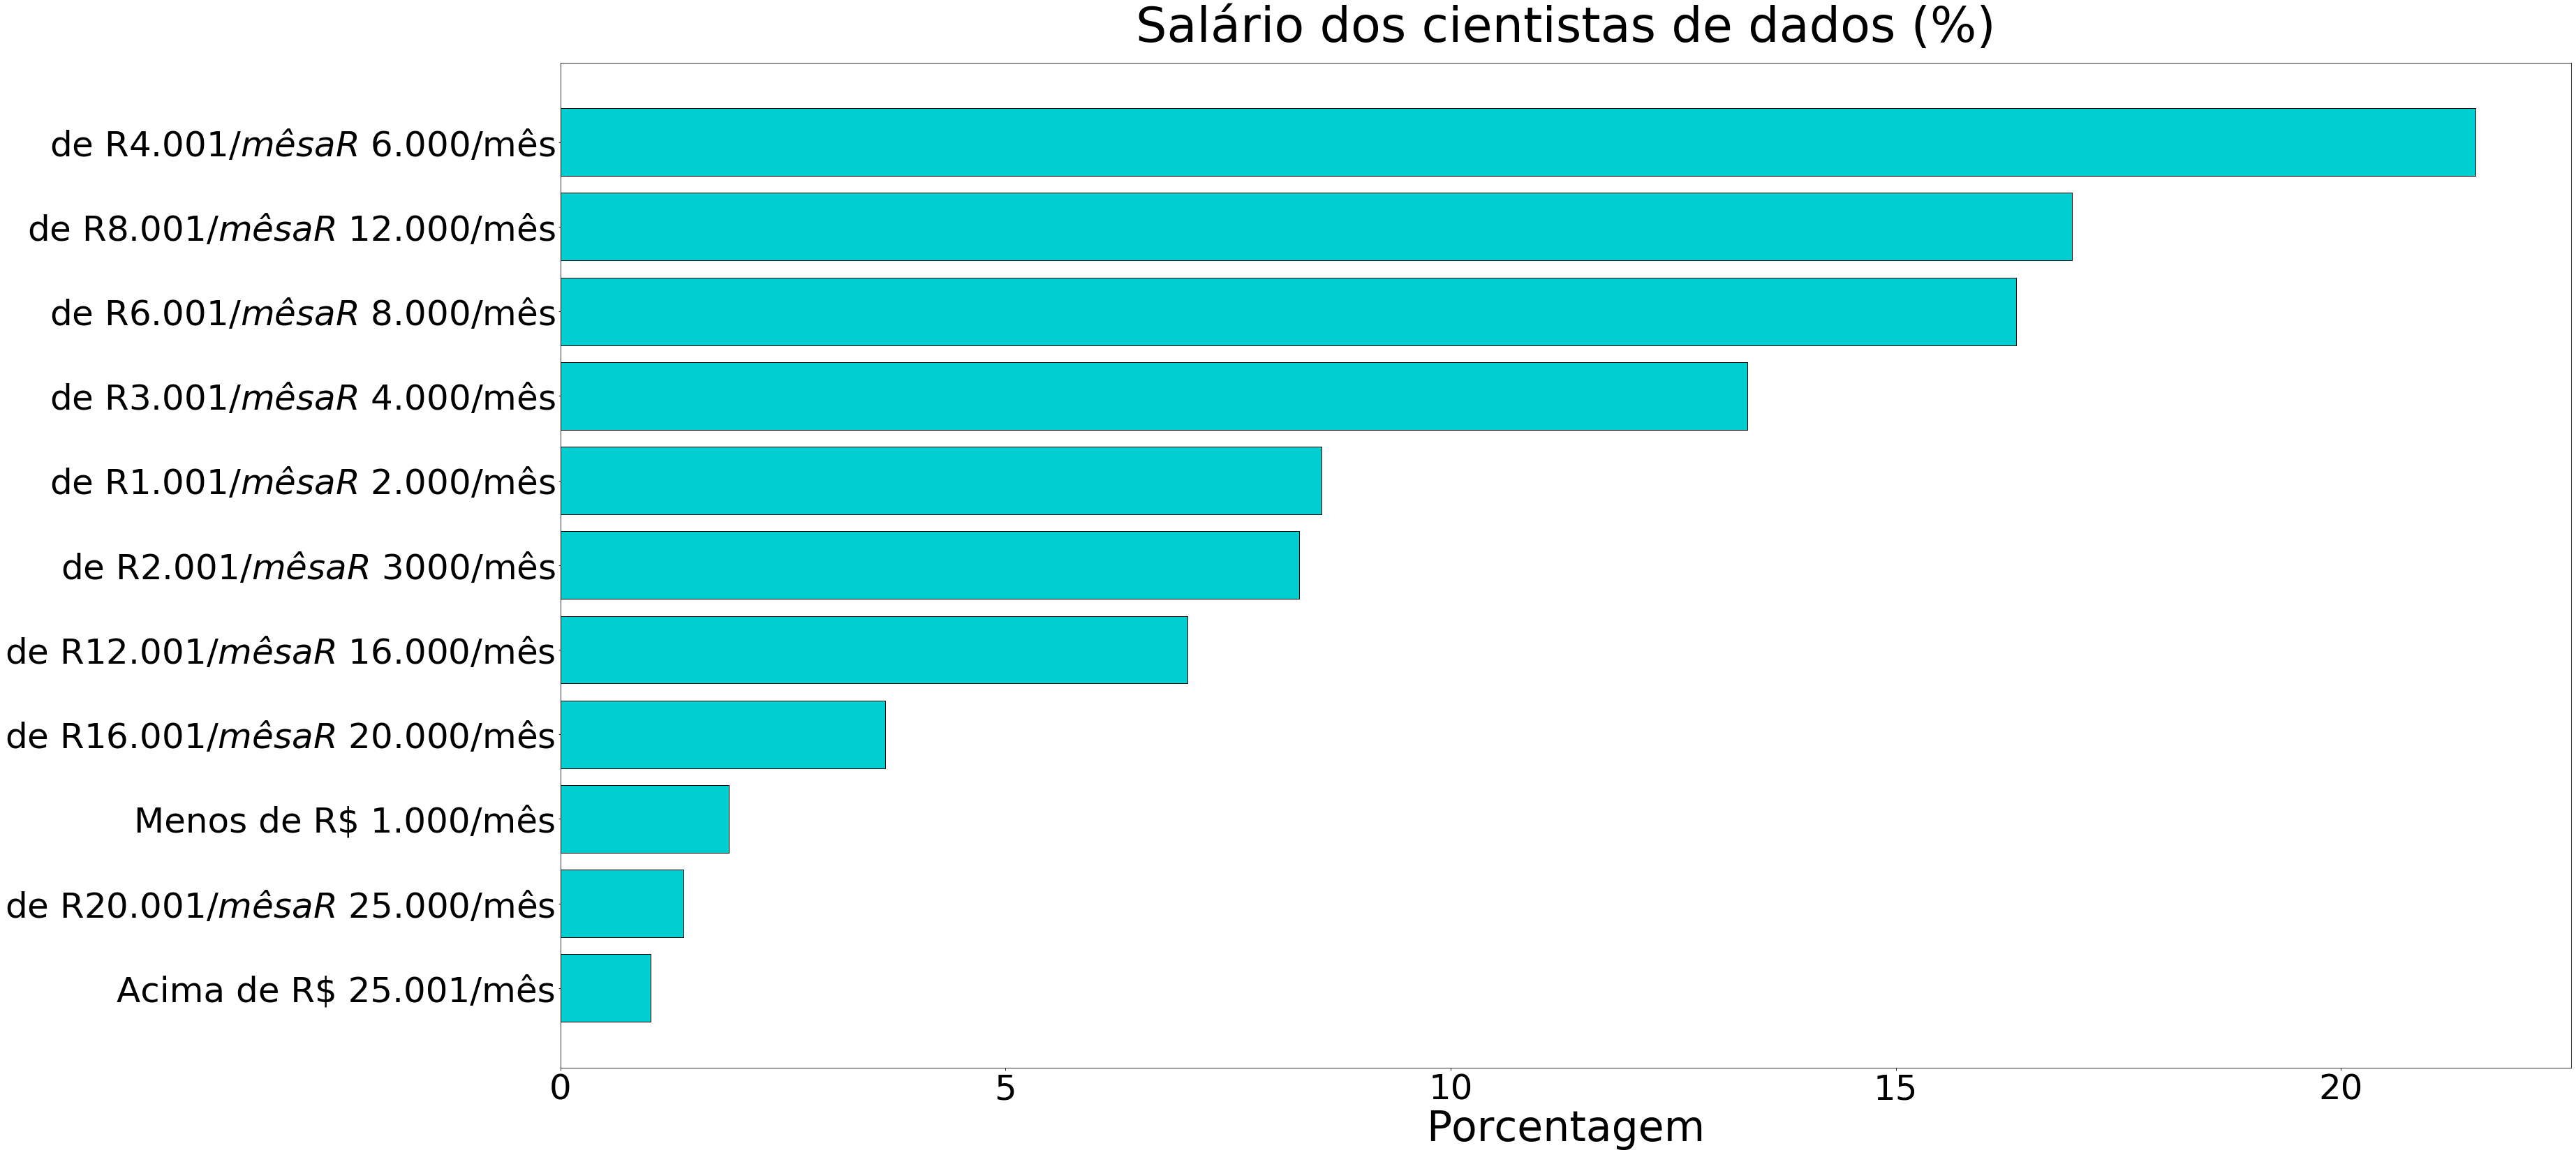

In [20]:
#Estabelecendo o tamanho do gráfico
fig = plt.figure(figsize=(40,20))
eixo=fig.add_axes([0,0,1,1])
#Criando um gráfico de barras horizontais definindo, altura das barras,alinhamento, cor e cor da linha da barra
eixo.barh(din['tipo'],din['%_total'],height=0.8,edgecolor='k',align='center',color='darkturquoise')
#Colocando título do gráfico, tamanho da fonte e distância do título para o gráfico(pad)
eixo.set_title('Salário dos cientistas de dados (%)', fontsize=70, pad=30)
##Aumentando o tamanho dos rótulos do gráfico
eixo.tick_params(labelsize = 50)
#Colocando os valores do eixo y do maior para o menor
eixo.invert_yaxis()
##Nomeando o eixo 'X' e escolhendo o tamanho da fonte
eixo.set_xlabel('Porcentagem', fontsize=60)

Entre os cientistas que responderam o questionário, 71.17% deles recebiam salários entre R$ 3.000,00 e 12.000,00. Os valores podem estar associados a experiencia na área e formação dos indivíduos.

### Analisando linguagem de programação mais usada

In [21]:
#Extraindo dados de linguagem de programação mais usada para um DataFrame
lin=pd.DataFrame(dados['most_used_proggraming_languages'].value_counts())
#Transformando o índice em coluna
lin.reset_index(inplace=True)
#Renomeando as colunas
lin.columns=['tipo','total']
#Visualiando o DataFrame
lin

,tipo,total
0,Python,459
1,SQL,279
2,R,91
3,SAS/Stata,19
4,Java,17
5,Visual Basic/VBA,12
6,Não utilizo nenhuma das linguagens listadas,10
7,Scala,10
8,C/C++/C#,9


Text(0.5, 0, 'Número de cientistas')

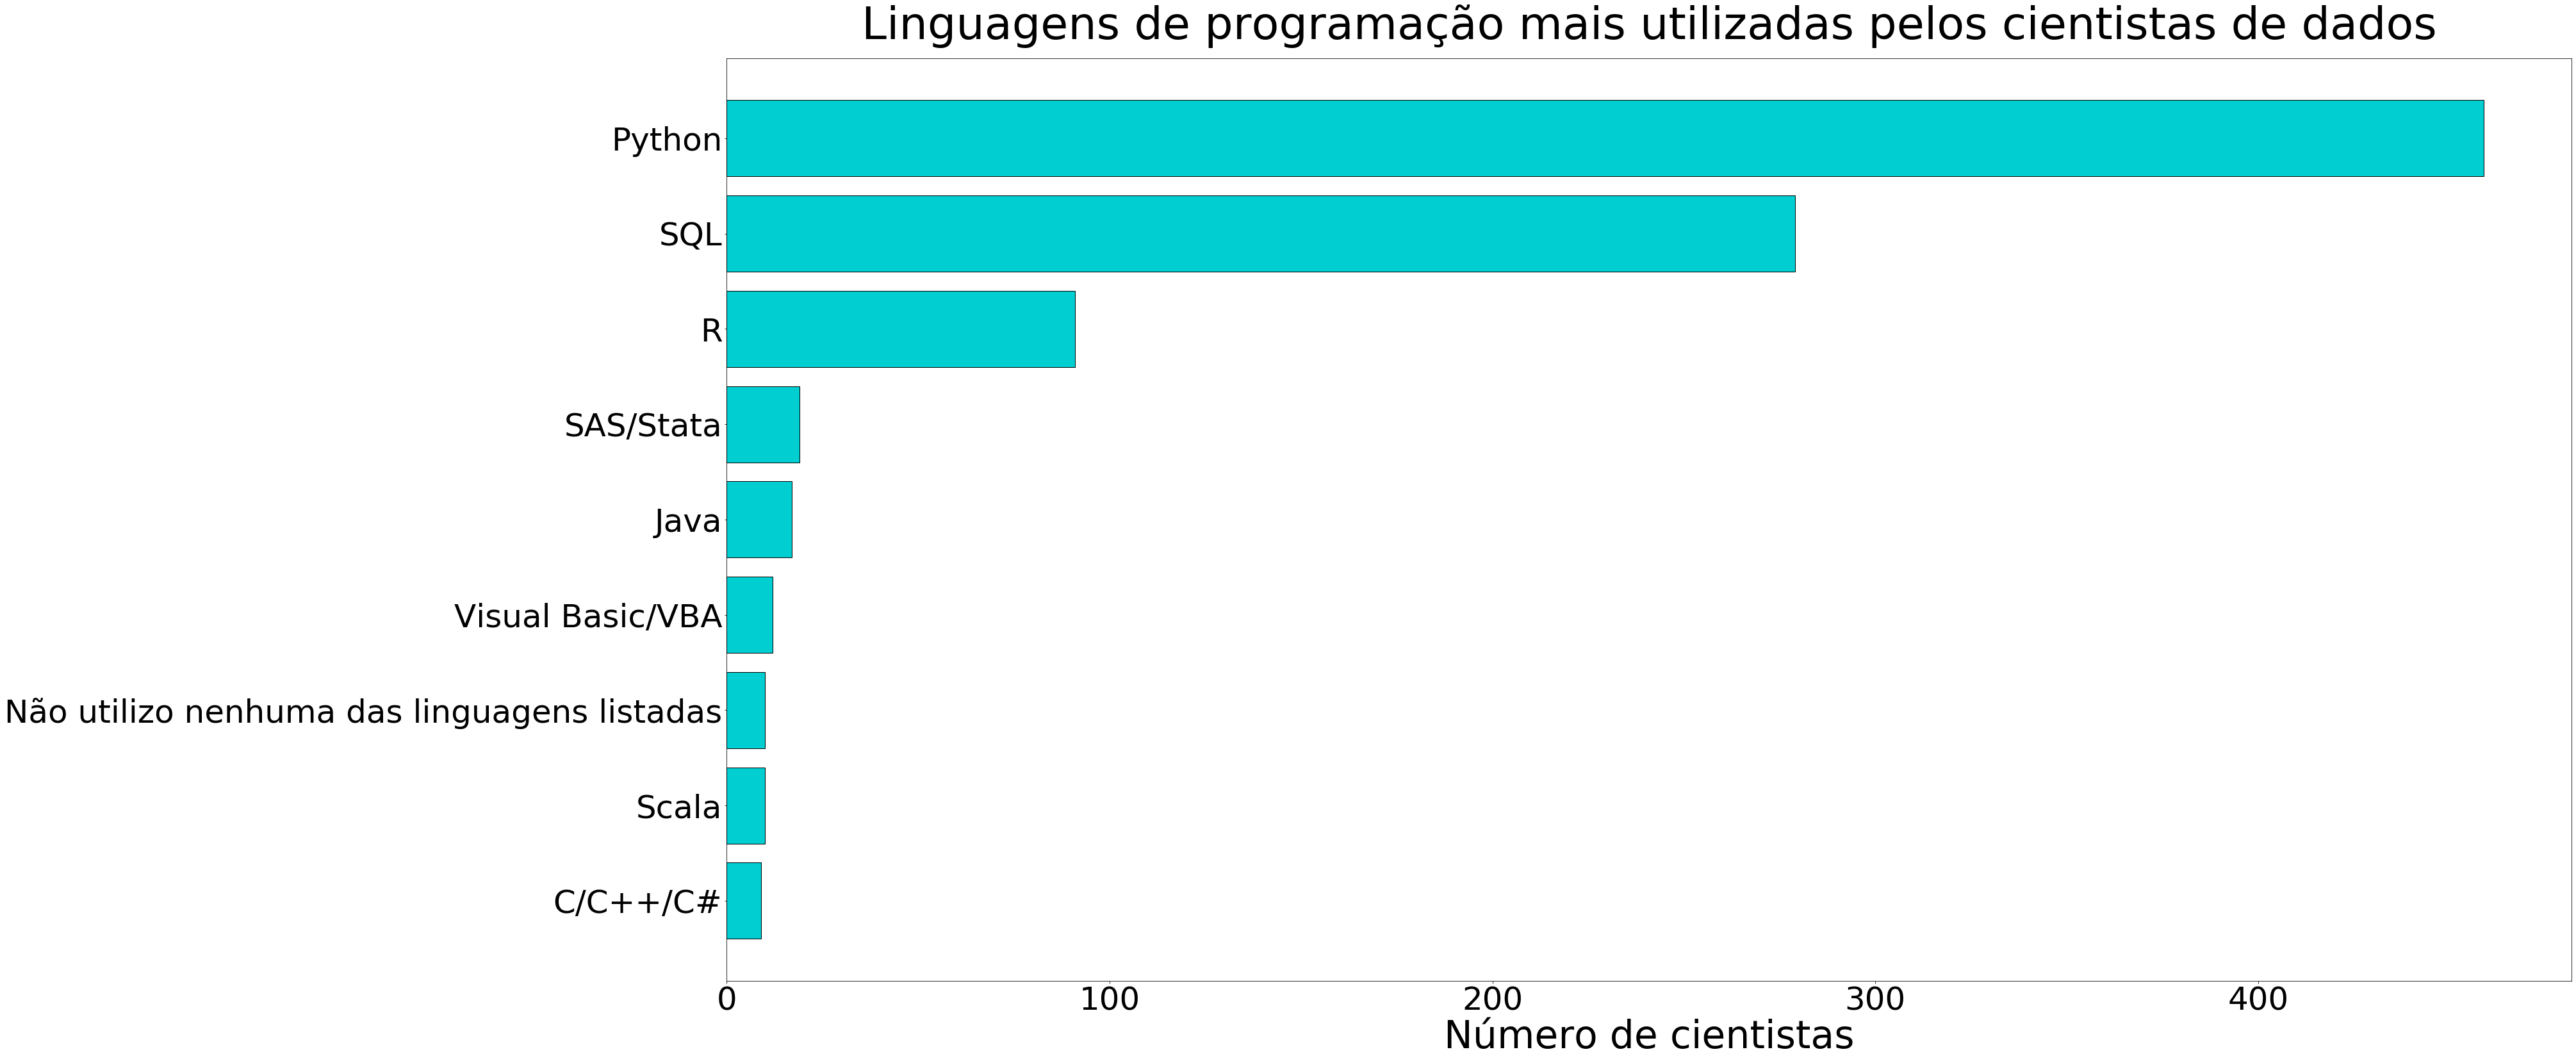

In [22]:
#Estabelecendo o tamanho do gráfico
fig = plt.figure(figsize=(40,20))
eixo=fig.add_axes([0,0,1,1])
#Criando um gráfico de barras horizontais definindo, altura das barras,alinhamento, cor e cor da linha da barra
eixo.barh(lin['tipo'],lin['total'],height=0.8,edgecolor='k',align='center',color='darkturquoise')
#Colocando título do gráfico, tamanho da fonte e distância do título para o gráfico(pad)
eixo.set_title('Linguagens de programação mais utilizadas pelos cientistas de dados', fontsize=70, pad=30)
##Aumentando o tamanho dos rótulos do gráfico
eixo.tick_params(labelsize = 50)
#Colocando os valores do eixo y do maior para o menor
eixo.invert_yaxis()
##Nomeando o eixo 'X' e escolhendo o tamanho da fonte
eixo.set_xlabel('Número de cientistas', fontsize=60)

A linguagem mais utilizada pelos ciêntistas foi o Python, seguidos da linguagem SQL e R. Assim, investir no conhecimento dessas linguagens pode ser de grande valia para quem busca ingressar na área. 

### Analisando os estados que vivem

In [23]:
#Selecionando por estado
est=pd.DataFrame(dados['living_state'].value_counts())
#Transformando o índice em coluna
est.reset_index(inplace=True)
#Renomeando as coluna
est.columns=['estado','total']
#Visualizando o DataFrame
est

,estado,total
0,São Paulo (SP),351
1,Minas Gerais (MG),162
2,Rio de Janeiro (RJ),86
3,Paraná (PR),44
4,Rio Grande do Sul (RS),42
5,Santa Catarina (SC),36
6,Espírito Santo (ES),10


Text(0.5, 0, 'Número de cientistas')

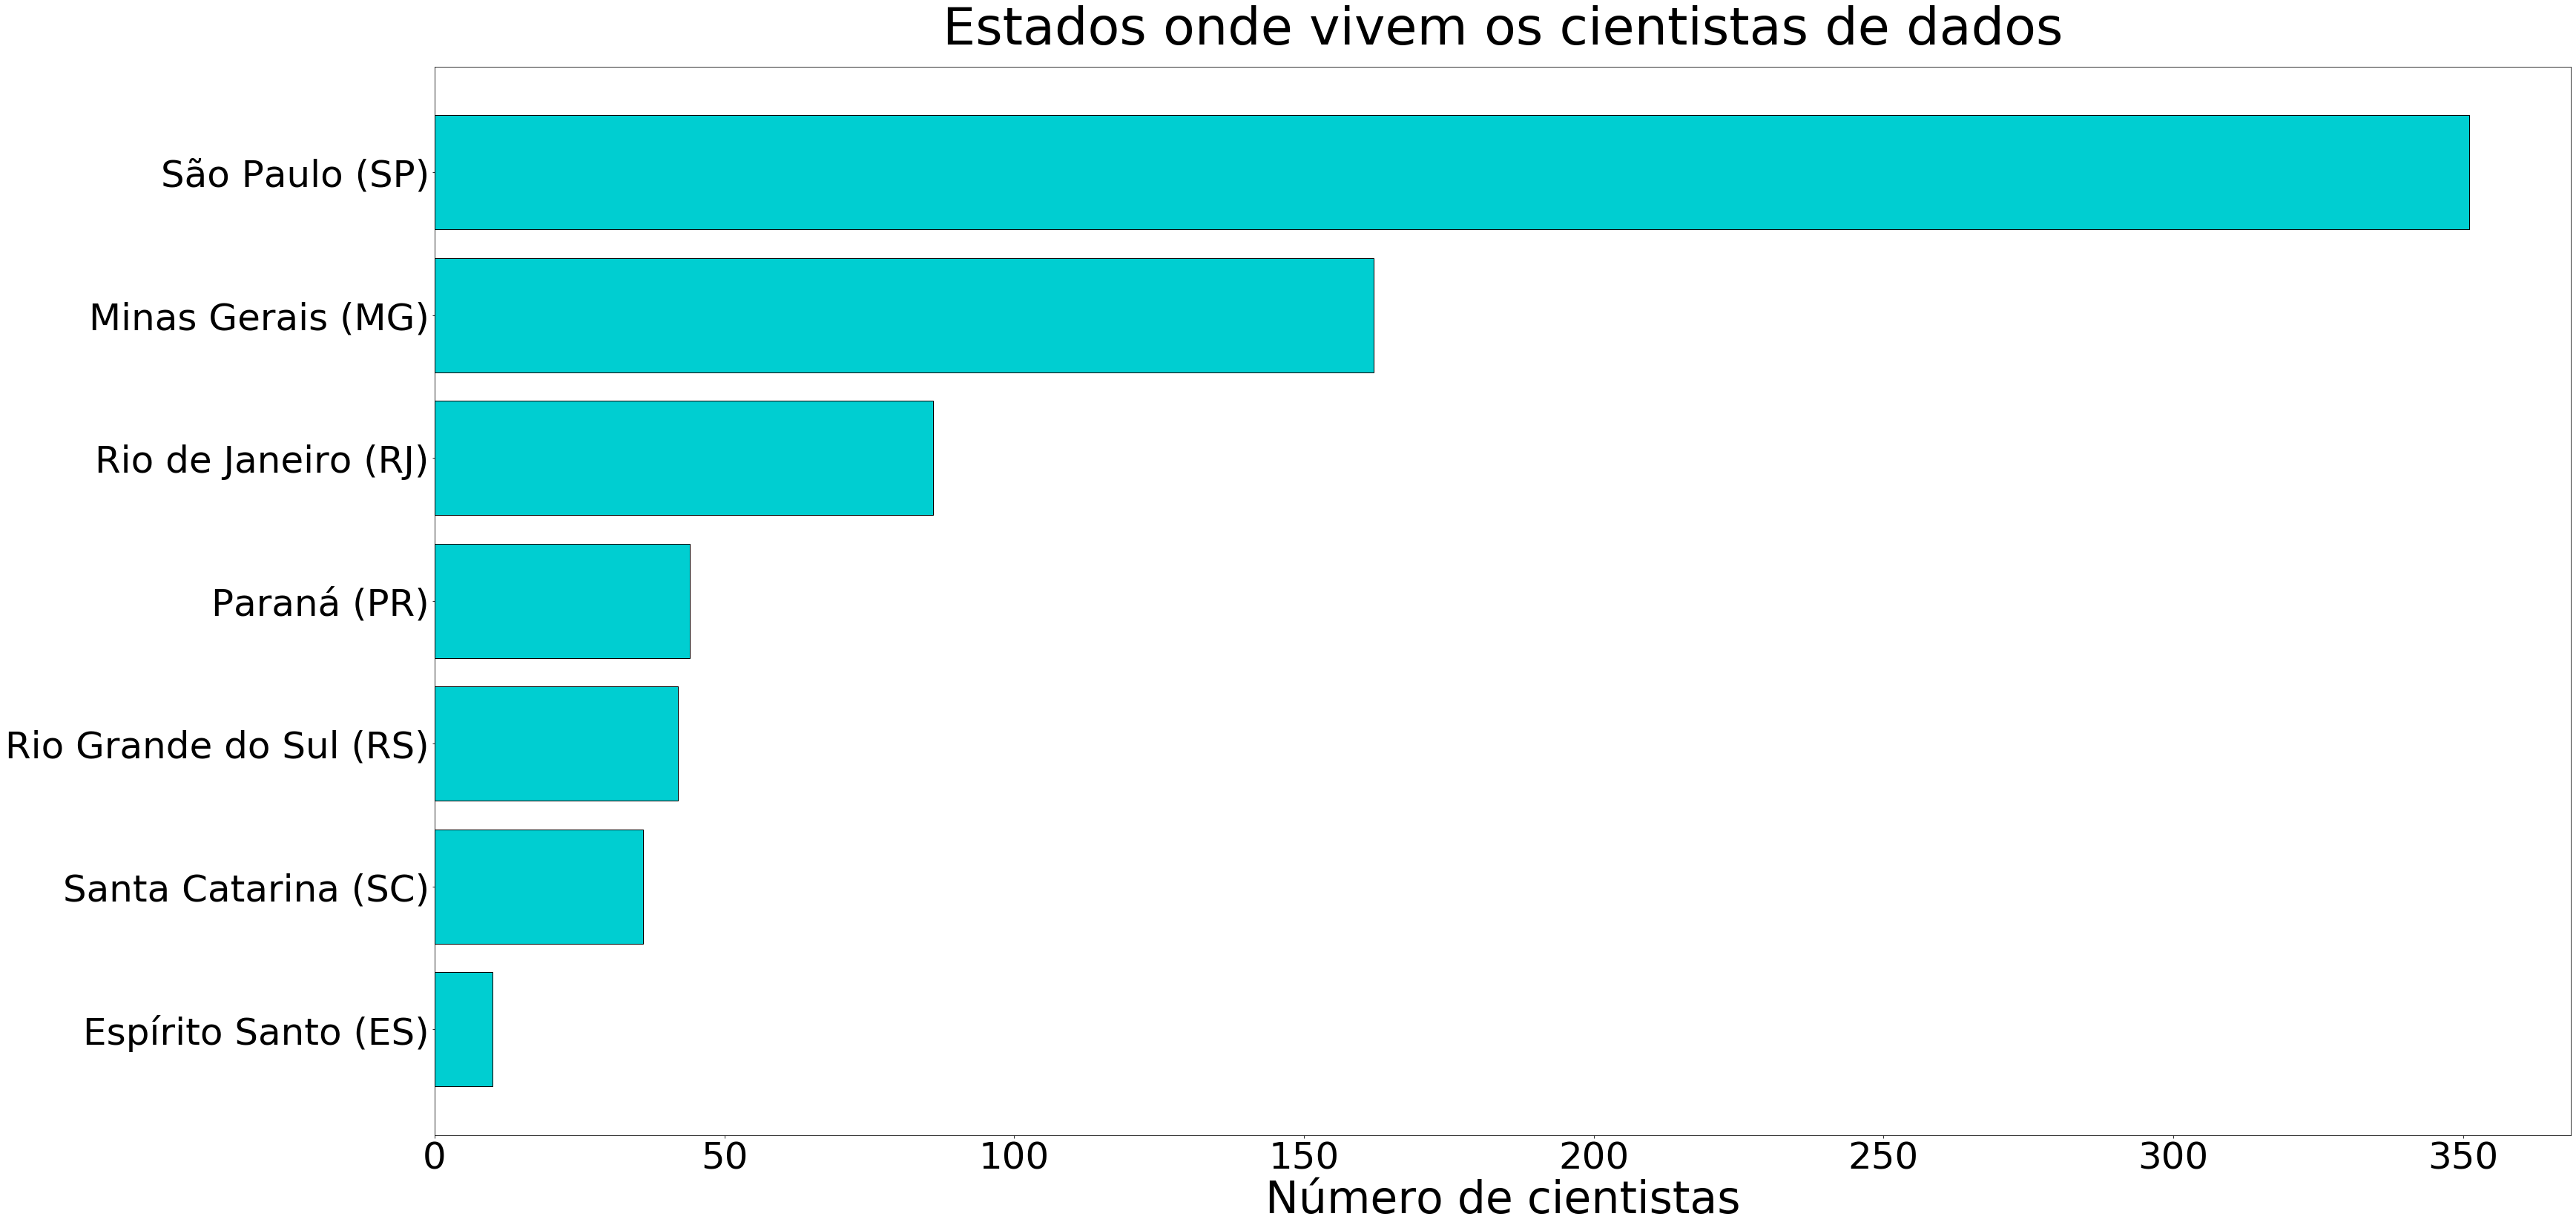

In [24]:
#Estabelecendo o tamanho do gráfico
fig = plt.figure(figsize=(40,20))
eixo=fig.add_axes([0,0,1,1])
#Criando um gráfico de barras horizontais definindo, altura das barras,alinhamento, cor e cor da linha da barra
eixo.barh(est['estado'],est['total'],height=0.8,edgecolor='k',align='center',color='darkturquoise')
#Colocando título do gráfico, tamanho da fonte e distância do título para o gráfico(pad)
eixo.set_title('Estados onde vivem os cientistas de dados', fontsize=70, pad=30)
##Aumentando o tamanho dos rótulos do gráfico
eixo.tick_params(labelsize = 50)
#Colocando os valores do eixo y do maior para o menor
eixo.invert_yaxis()
##Nomeando o eixo 'X' e escolhendo o tamanho da fonte
eixo.set_xlabel('Número de cientistas', fontsize=60)

Houve uma concentração de cientistas de dados nas regiões Sul e Sudeste do país dentre as pessoas que responderam o questionário. 

Dessa maneira, através da análise foi possível extrair uma amostra dos profissionais de Data Science no Brasil, e através desta traçar um perfil desses profissonais no país.   